In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

import imblearn

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib import gridspec
from collections import Counter
from imblearn.over_sampling import SMOTE

import copy
import math
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

data = pd.read_csv("/creditcard.csv")

In [2]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

data = data.drop(['Time'],axis=1)
data.head()

from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

X_train.shape (190820, 30) y_train.shape (190820,)
X_test.shape (93987, 30) y_test.shape (93987,)


In [3]:

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train,y_train)

y_pred = decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.9990743400683073

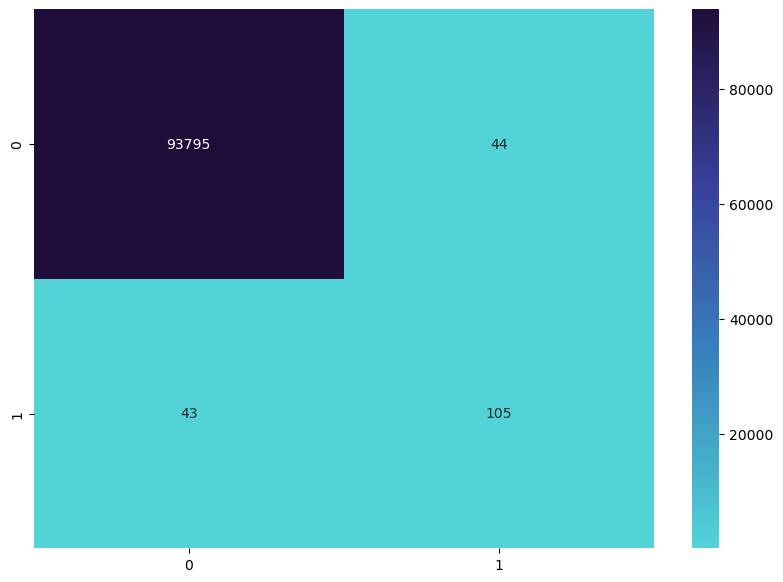

Test Data Accuracy: 0.9991


In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.colors as mcolors


# Define the custom colormap
colors = ['#52D3D8', '#3887BE', '#38419D', '#200E3A']
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Binarize the predictions
y_pred = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])

# Plot the confusion matrix with the custom color scheme
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, fmt='g', cmap=cmap)
plt.show()

# Print the accuracy
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))